In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [23]:
#We load our dataset.
data_fetch = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
#We take the data and target variables.
data = data_fetch.data
target = data_fetch.target
target_names = data_fetch.target_names
#We create a DataFrame.
df = pd.DataFrame({'text': data, 'target': target})


In [24]:
df.head()

,text,target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18846 entries, 0 to 18845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    18846 non-null  object
 1   target  18846 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 294.6+ KB


In [26]:
print(df['target'].value_counts())

target
10    999
15    997
8     996
9     994
11    991
7     990
13    990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
Name: count, dtype: int64


In [27]:
for i in range(5):
    print(df['text'][i])
    print("-------------------------------------------------------------")

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


-------------------------------------------------------------
From: mblawson@midway.ecn.uoknor.ed

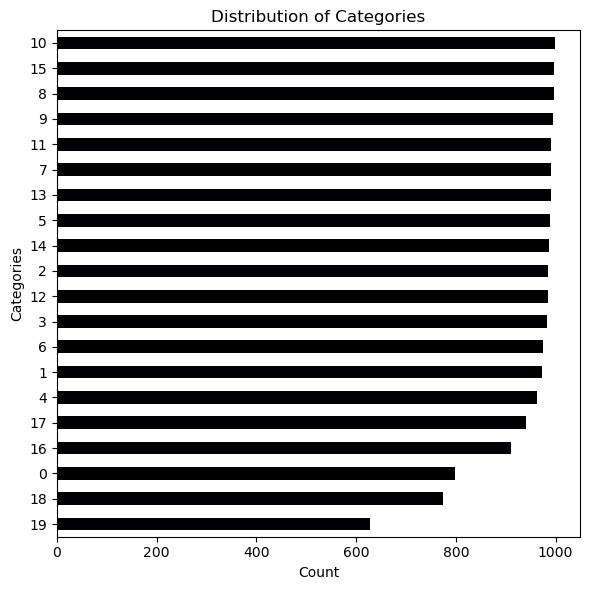

In [28]:
plt.figure(figsize=(6, 6))
df['target'].value_counts().sort_values().plot(kind='barh', colormap='inferno')
plt.title('Distribution of Categories')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.tight_layout() # Etiketlerin sıkışmasını önler
plt.show()

In [29]:
X = df['text']
y = df['target']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [32]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [33]:
predictions = classifier.predict(X_test_vec)

In [34]:
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

report = classification_report(y_test, predictions)
print('Classification Report:\n', report)

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       151
           1       0.62      0.91      0.74       202
           2       0.91      0.21      0.34       195
           3       0.59      0.86      0.70       183
           4       0.89      0.87      0.88       205
           5       0.84      0.82      0.83       215
           6       0.94      0.62      0.75       193
           7       0.88      0.94      0.91       196
           8       0.95      0.92      0.93       168
           9       0.98      0.96      0.97       211
          10       0.96      0.96      0.96       198
          11       0.87      0.96      0.91       201
          12       0.90      0.83      0.86       202
          13       0.95      0.92      0.93       194
          14       0.91      0.98      0.94       189
          15       0.79      0.99      0.88       202
          16       0.88      0.93      0.9